In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# 获取数据
filepath = r'原始数据.xlsx'                      # 使用了1981 到 2017年的数据,  因为  1980 和 2018 年的数据都是空的
WorkBook_BasedOnPres = pd.ExcelFile(filepath)
# 查看所有表格的名称
sheet_names = WorkBook_BasedOnPres.sheet_names    
#获取数据
i_sheet_data = pd.read_excel(filepath, sheet_names[0])

# 获取所有列标题
headers =  i_sheet_data.columns.tolist()


Vmax = i_sheet_data['WMO_WIND']
Pres = i_sheet_data['WMO_PRES']
R17 = i_sheet_data['DeepTCSize_R34']
RMW = i_sheet_data['DeepTCSize_RMW']
TCF = i_sheet_data['DeepTCSize_TCF'].round(1)       # 四舍五入保留了一位小数


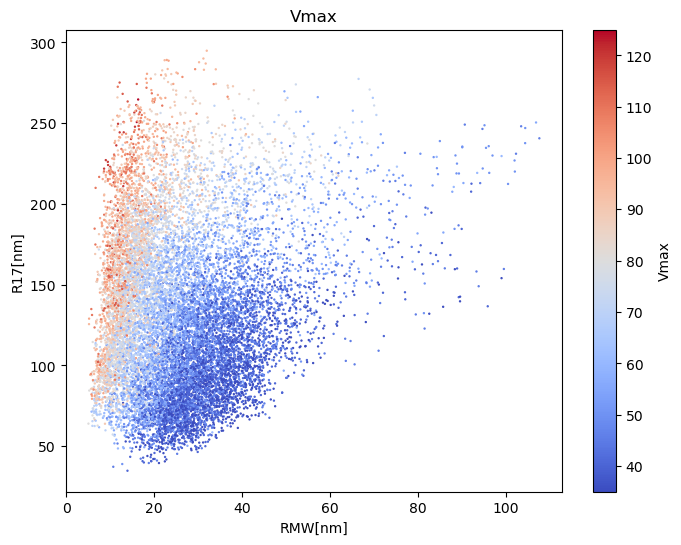

In [19]:
# 下面画的是  Vmax 
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(RMW, R17 , c=Vmax , s= 0.5 , cmap='coolwarm' )
ax.set_xlabel("RMW[nm]")
ax.set_ylabel("R17[nm]")

# 添加颜色条
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Vmax')
plt.title('Vmax')
plt.savefig("Vmax",dpi=200)

# 显示图形
plt.show()


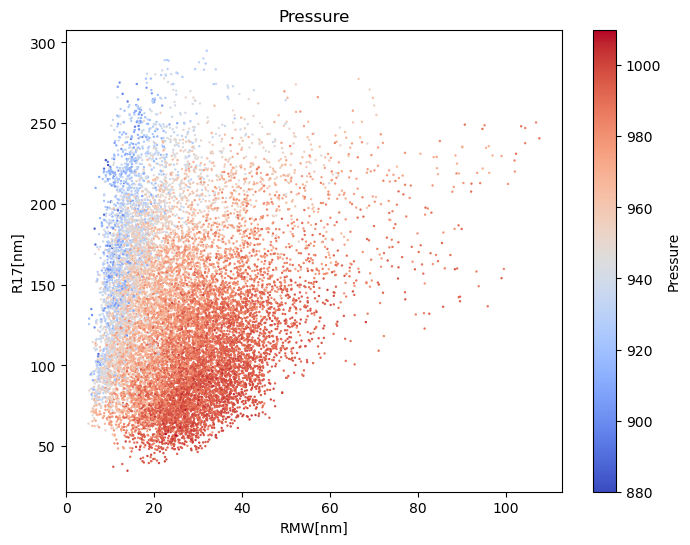

In [54]:
# 下面画的是 Pressure
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(RMW, R17 , c=Pres , s= 0.5 , cmap='coolwarm' )
ax.set_xlabel("RMW[nm]")
ax.set_ylabel("R17[nm]")

# 添加颜色条
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Pressure')
plt.title('Pressure')
plt.savefig("Pressure",dpi=200)

# 显示图形
plt.show()



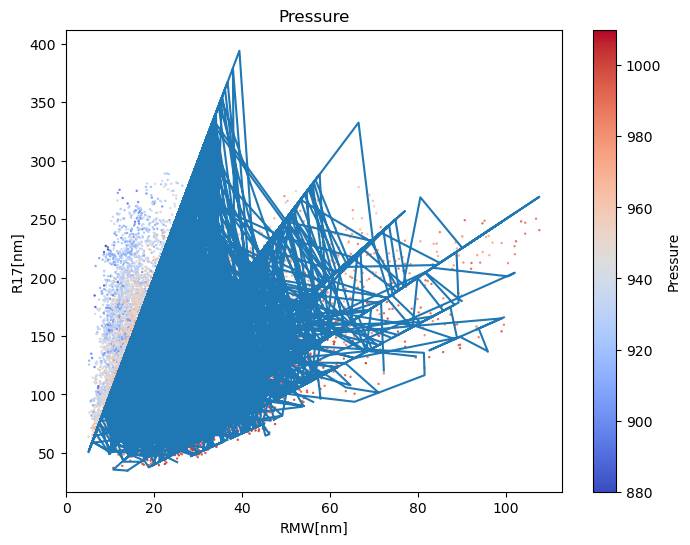

In [126]:

# 下面画的是 Pressure
fig, ax = plt.subplots(figsize=(8,6))
coeff = np.array([1-TCF[i]  for i in range(len(TCF))  ])
for i in range(len(coeff)):    # 去除 零  
    if coeff[i] == 0 : 
        coeff[i] = np.nan
        # print(RMW[i])        #  查看 所有丰满度为 1 的 RMW
longitudinal_axis = [  (RMW[i]/coeff[i]) for i in range(len(TCF)) ] 

# 画直线
ax.plot(RMW, longitudinal_axis)

# 画点图
sc = ax.scatter(RMW, R17 , c=Pres , s= 0.5 , cmap='coolwarm' )
ax.set_xlabel("RMW[nm]")
ax.set_ylabel("R17[nm]")

# 添加颜色条
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Pressure')
plt.title('Pressure')
plt.savefig("Pressure",dpi=200)

# 显示图形
plt.show()

In [62]:
print(len(RMW)/890)

20.085393258426965


In [139]:
all_TCF_value = TCF.drop_duplicates().sort_values()
print(all_TCF_value)

555     0.3
464     0.4
445     0.5
446     0.6
421     0.7
424     0.8
427     0.9
1297    1.0
0       NaN
Name: DeepTCSize_TCF, dtype: float64


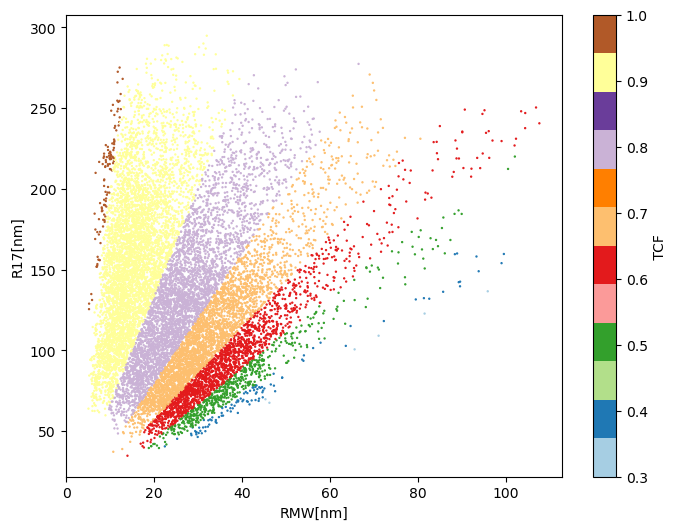

In [96]:
fig, ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(RMW, R17 , c=TCF , s= 0.5 , cmap='Paired' )
ax.set_xlabel("RMW[nm]")
ax.set_ylabel("R17[nm]")

# 添加颜色条
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel(' TCF ')

plt.savefig("TCF" ,dpi=200)

# 显示图形
plt.show()  

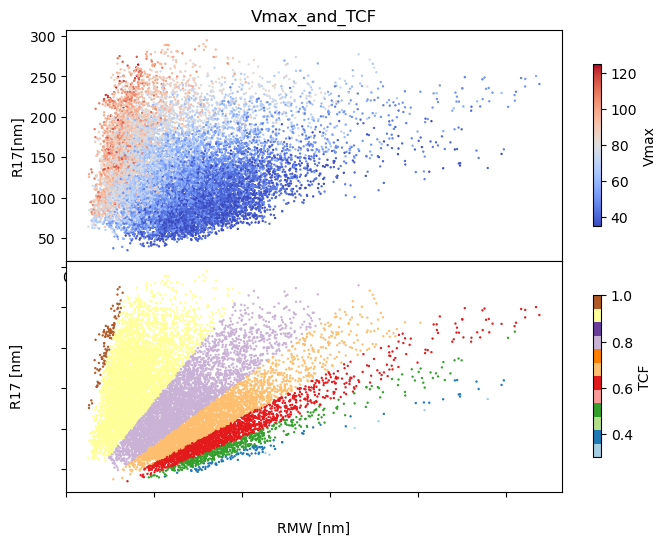

In [69]:
fig = plt.figure(figsize=(8, 6))

# 创建一个网格布局，两个子图共享x轴
gs = fig.add_gridspec(2, 1, height_ratios=[3, 3], hspace=0)

# 第一个子图
ax1 = fig.add_subplot(gs[0])
sc1 = ax1.scatter(RMW, R17, c=Vmax, s=0.5, cmap='coolwarm')
ax1.set_xlabel("RMW [nm]")
ax1.set_ylabel("R17[nm]")
cbar1 = fig.colorbar(sc1, ax=ax1, shrink=0.7)
cbar1.ax.set_ylabel('Vmax')
plt.title('Vmax_and_TCF')

# 第二个子图，共享x轴但y轴不同
ax2 = fig.add_subplot(gs[1], sharex=ax1)
sc2 = ax2.scatter(RMW, R17, c=TCF, s=0.5, cmap='Paired')
ax2.set_xlabel("RMW [nm]")
ax2.set_ylabel("R17 [nm]")  # 不需要单位，因为在同一直角坐标系下单位与上半部分一致
ax2.yaxis.tick_left()  # 只显示左侧刻度线
ax2.yaxis.set_label_position("left")  # 左侧放置标签
ax2.tick_params(labelcolor='none')  # 隐藏y轴刻度标签
cbar2 = fig.colorbar(sc2, ax=ax2, orientation='vertical', shrink=0.7)
cbar2.ax.set_ylabel('TCF')

plt.savefig("Vmax_and_TCF",dpi=200)

plt.show()

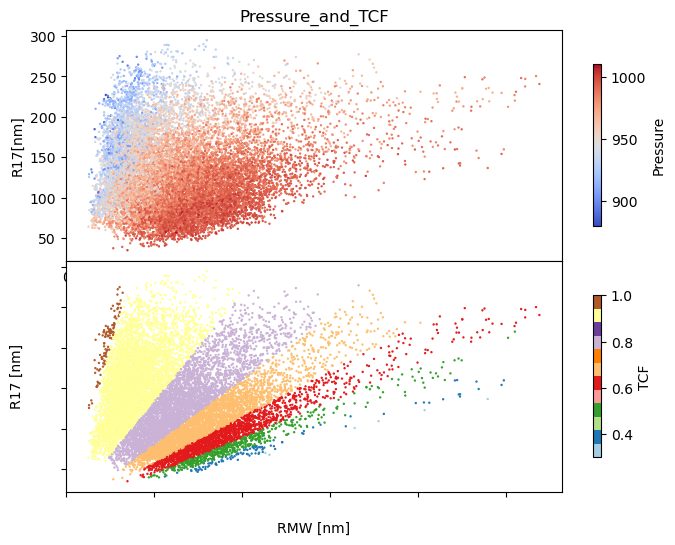

In [70]:
fig = plt.figure(figsize=(8, 6))

# 创建一个网格布局，两个子图共享x轴
gs = fig.add_gridspec(2, 1, height_ratios=[3, 3], hspace=0)

# 第一个子图
ax1 = fig.add_subplot(gs[0])
sc1 = ax1.scatter(RMW, R17, c=Pres, s=0.5, cmap='coolwarm')
ax1.set_xlabel("RMW [nm]")
ax1.set_ylabel("R17[nm]")
cbar1 = fig.colorbar(sc1, ax=ax1, shrink=0.7)
cbar1.ax.set_ylabel('Pressure')
plt.title('Pressure_and_TCF')

# 第二个子图，共享x轴但y轴不同
ax2 = fig.add_subplot(gs[1], sharex=ax1)
sc2 = ax2.scatter(RMW, R17, c=TCF, s=0.5, cmap='Paired')
ax2.set_xlabel("RMW [nm]")
ax2.set_ylabel("R17 [nm]")  # 不需要单位，因为在同一直角坐标系下单位与上半部分一致
ax2.yaxis.tick_left()  # 只显示左侧刻度线
ax2.yaxis.set_label_position("left")  # 左侧放置标签
ax2.tick_params(labelcolor='none')  # 隐藏y轴刻度标签
cbar2 = fig.colorbar(sc2, ax=ax2, orientation='vertical', shrink=0.7)
cbar2.ax.set_ylabel('TCF')
plt.savefig("Pressure_and_TCF",dpi=200)

plt.show()

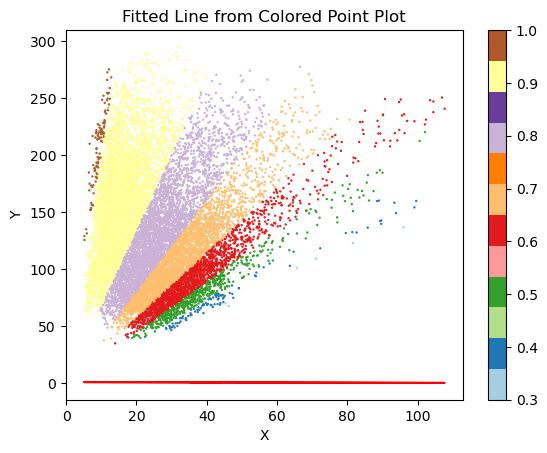

In [81]:

from sklearn.linear_model import LinearRegression

# 使用线性回归模型
model = LinearRegression()

# 为了能够使用模型, 必须 删除含有 nan的行
data = pd.DataFrame({
    'RMW': RMW , 
    'TCF' : TCF , 
    'R17' : R17
    
})

data_clear_nan = data.dropna()
new_RMW = data_clear_nan['RMW']
new_TCF= data_clear_nan['TCF']
new_R17 = data_clear_nan['R17']
# 将x, y组合成特征矩阵X
X = np.column_stack((new_RMW, new_R17))

# 训练线性回归模型
model.fit(X, new_TCF )

# 得到斜率和截距
slope = model.coef_
intercept = model.intercept_

# 用斜率和截距构建直线函数
def line_func(x):
    return slope[0] * x + intercept

# 画出原始点图
plt.scatter(new_RMW, new_R17, c=new_TCF, s=0.5, cmap='Paired')

# 画出拟合的直线
plt.plot(new_RMW, line_func(new_RMW), 'r-', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitted Line from Colored Point Plot')
plt.colorbar()
plt.show()

# Shift + Tab   可以显示底层用法

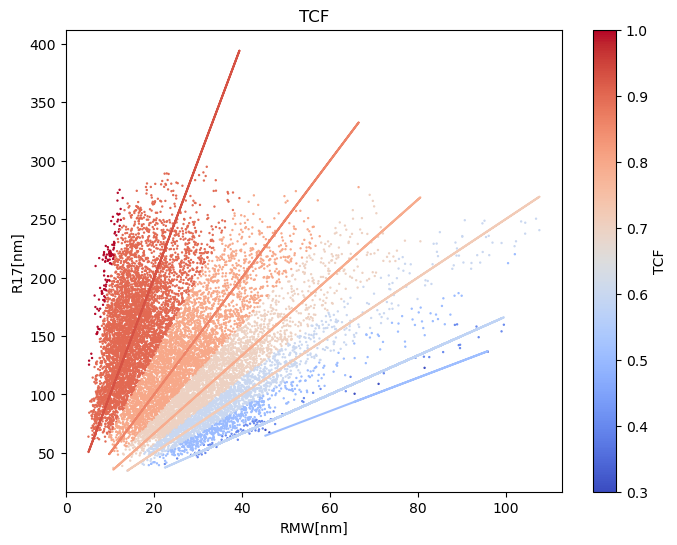

In [140]:

# 将数据先提取出来
stand_list = np.linspace(0,1,10).round(1)
# 先提取 0.3 这个数据 
i_dict = {}

fig, ax = plt.subplots(figsize=(8,6))
for i_value in stand_list: 
    all_index = TCF[TCF == i_value].index
    # 获取对应的  RMW 和 R17 
    i_RMW =[RMW[i_index]    for i_index in all_index]
    i_longitudinal_axis = [ longitudinal_axis[i_index] for i_index in all_index ] 
    # 画出直线图部分
    ax.plot(i_RMW,  i_longitudinal_axis , c=plt.cm.coolwarm(i_value))
    # ax.annotate('0.9', (25,250), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

    
# 画点图
sc = ax.scatter(RMW, R17 , c=TCF , s= 0.5 , cmap='coolwarm' )
ax.set_xlabel("RMW[nm]")
ax.set_ylabel("R17[nm]")

# 添加颜色条
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('TCF')
plt.title('TCF')
    
    # 显示图形
plt.show()
